In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\data_set.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


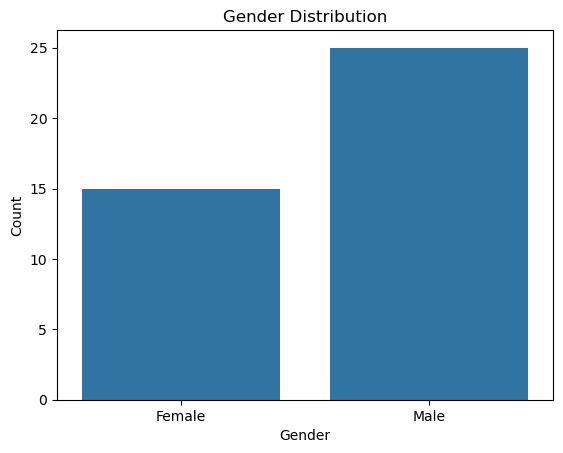

In [5]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [9]:
print(df.columns.tolist())


['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']


In [20]:
['age', 'Mutual Funds', 'Equity Market', 'Fixed Deposits', 'Debenture', 'Reason Bonds']


['age',
 'Mutual Funds',
 'Equity Market',
 'Fixed Deposits',
 'Debenture',
 'Reason Bonds']

In [21]:
numeric_cols = ['age', 'Mutual Funds', 'Equity Market', 'Fixed Deposits', 'Debenture', 'Reason Bonds']


In [22]:
numeric_cols = ['age', 'Mutual_Funds', 'Equity_Market', 'Fixed_Deposits', 'Debentures', 'Reason_Bonds']
df[numeric_cols].describe()

,age,Mutual_Funds,Equity_Market,Fixed_Deposits,Debentures
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,3.575000,5.750000
std,3.560467,1.197219,1.131994,1.795828,1.675617
min,21.000000,1.000000,1.000000,1.000000,1.000000
25%,25.750000,2.000000,3.000000,2.750000,5.000000
50%,27.000000,2.000000,4.000000,3.500000,6.500000
75%,30.000000,3.000000,4.000000,5.000000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000


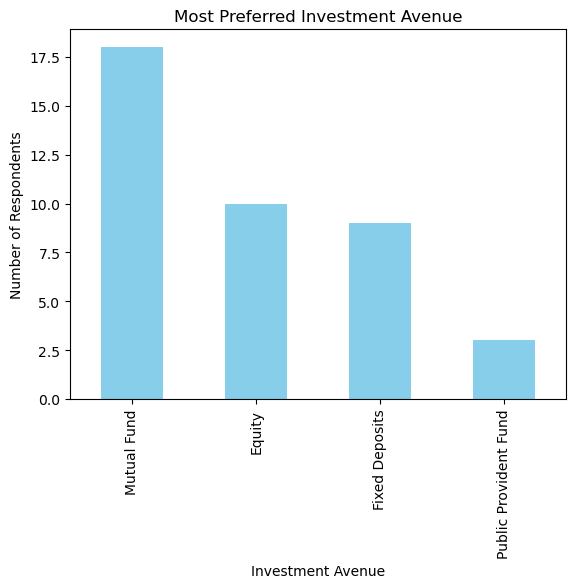

In [23]:
preferred_avenue = df['Avenue'].value_counts()
preferred_avenue.plot(kind='bar', color='skyblue')
plt.title("Most Preferred Investment Avenue")
plt.xlabel("Investment Avenue")
plt.ylabel("Number of Respondents")
plt.show()

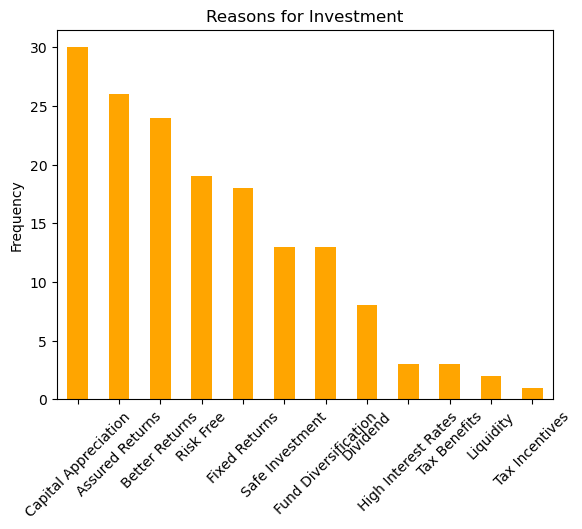

In [24]:
reason_cols = ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']
all_reasons = df[reason_cols].values.flatten()
reason_series = pd.Series(all_reasons).value_counts()
reason_series.plot(kind='bar', color='orange')
plt.title("Reasons for Investment")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

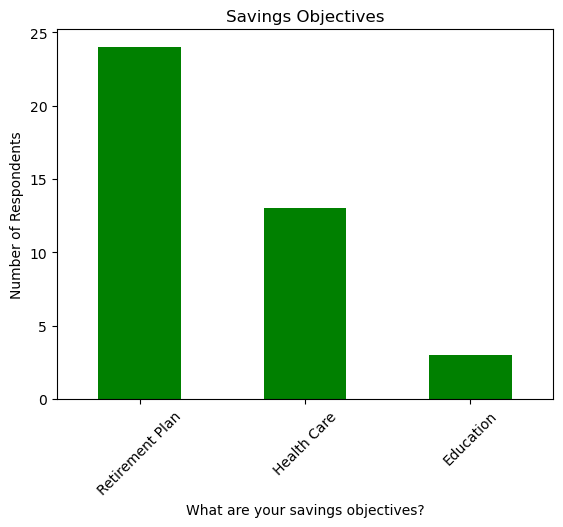

In [25]:
savings_obj = df['What are your savings objectives?'].value_counts()
savings_obj.plot(kind='bar', color='green')
plt.title("Savings Objectives")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

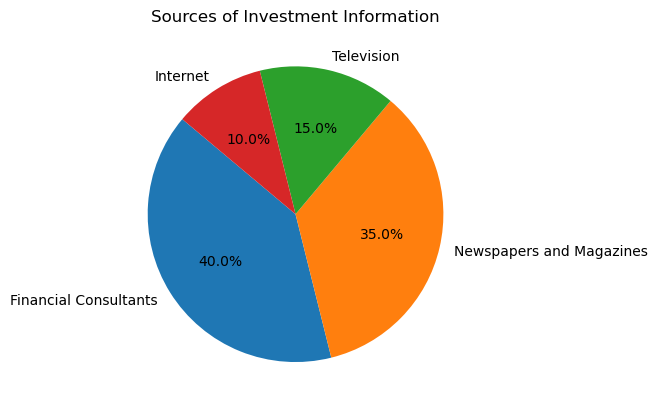

In [26]:
info_sources = df['Source'].value_counts()
info_sources.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sources of Investment Information")
plt.ylabel("")
plt.show()

In [27]:
duration_map = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 6
}
df['Duration_mapped'] = df['Duration'].map(duration_map)
print("Average Investment Duration:", df['Duration_mapped'].mean())

Average Investment Duration: 2.975


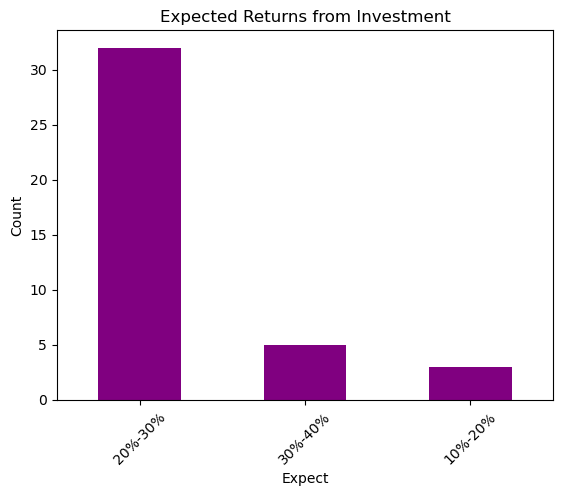

In [28]:
df['Expect'].value_counts().plot(kind='bar', color='purple')
plt.title("Expected Returns from Investment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [30]:
corr_cols = ['age', 'Mutual_Funds', 'Equity_Market', 'Fixed_Deposits', 'Debentures', 'Reason_Bonds', 'Duration_mapped']
correlations = df[corr_cols].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Safe Investment'